In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [3,21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [2,22,24,65,79,82,55,130,150,199]
y = np.array(y)

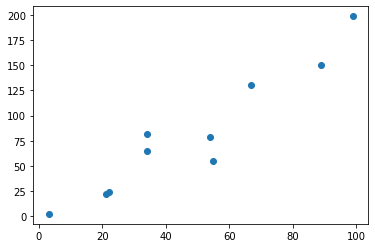

In [3]:
plt.scatter(x,y)

In [4]:
def model(a, b, x):
    return a*x + b

def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

def optimize(Lr, a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

def iterate(Lr, a,b,x,y,times):
    for i in range(times):
        a,b = optimize(Lr, a,b,x,y)
    return a,b

[0.71880973]
[0.66280612]
[0.72202573] [0.66285189] 1827.4973985294764
[1.19867289] [0.66947173] 655.93295039357
[1.58822097] [0.67412834] 228.40201606136426
[1.71945953] [0.67421522] 191.7014591128685
[1.74103116] [0.6719958] 190.8371584057736
[1.74288976] [0.66884007] 190.82141337213946


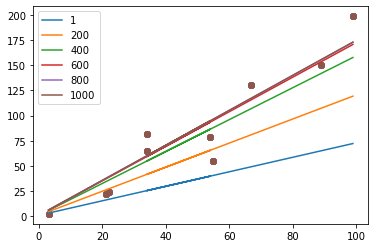

In [9]:
Lr = 0.000001
a_f = np.random.rand(1)
print(a_f)
b_f = np.random.rand(1)
print(b_f)

a = np.copy(a_f)
b = np.copy(b_f)
n_a = np.arange(1, 6) * 200
n_a = np.concatenate([[1], n_a])
a_loss = []

for n in n_a:
    a,b = iterate(Lr, a,b,x,y, n)
    prediction=model(a,b,x)
    loss = loss_function(a, b, x, y)
    a_loss.append(loss)

    print(a,b,loss)
    plt.scatter(x,y)
    plt.plot(x,prediction, label=n)

plt.legend(loc='best')
plt.show()

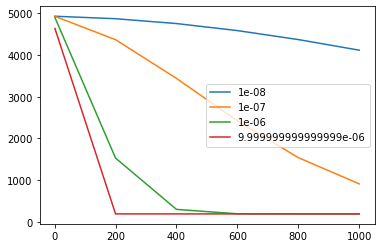

In [6]:
Lr = Lr * 0.01
for i in range (1, 5):
    a = np.copy(a_f)
    b = np.copy(b_f)
    a_loss = []
    for n in n_a:
        a,b = iterate(Lr, a,b,x,y, n)
        loss = loss_function(a, b, x, y)
        a_loss.append(loss)
    plt.plot(n_a, a_loss, label=Lr)
    Lr = Lr * 10

plt.legend(loc='best')
plt.show()